# Input Distributions

In this chapter, the default input distributions are presented.
These are automatically seeded when a new database is created.
They can be simply overwritten with your use-case specific assumptions.

First, the required modules are imported.

In [1]:
import datetime
import itertools

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

import conflowgen

Set a style for matplotlib.

In [2]:
plt.style.use('seaborn-colorblind')

Next, an
[in-memory SQLite database](https://www.sqlite.org/inmemorydb.html)
is opened.
This is a fresh database without any content.
While creating the database, it is automatically seeded with the default values.

In [3]:
database_chooser = conflowgen.DatabaseChooser()
database_chooser.create_new_sqlite_database(":memory:")

If that was too fast, you can switch on logging to have a look behind the scenes.

In [4]:
conflowgen.setup_logger(
    logging_directory="./data/logger",  # use data subdirectory relative to Jupyter Notebook
    format_string="%(message)s"  # only show log messages, no timestamps etc.
)

Creating log file at ./data/logger\2022-08-04--13-07-08.log


<Logger conflowgen (DEBUG)>

Now you can see the same output like in the demo scripts.

In [5]:
database_chooser.create_new_sqlite_database(":memory:")

Closing current database connection.
Opening file :memory:
journal_mode: memory
cache_size: -32768
page_size: 4096
foreign_keys: 1
Creating new database at :memory:
Creating all tables...
Seed with default values...


Once the database is set up, we can use the different distribution managers to have a look at the distributions which were automatically seeded.

## Container Length Distribution

For each container length, the container length distribution determines its frequency among the containers.
The numbers have been determined by the following reasoning:

The container length distribution is obtained with the following lines of code:

In [6]:
container_length_manager = conflowgen.ContainerLengthDistributionManager()

length_distribution = container_length_manager.get_container_length_distribution()

length_distribution

{<ContainerLength.other: -1>: 0.001,
 <ContainerLength.twenty_feet: 20>: 0.4,
 <ContainerLength.forty_feet: 40>: 0.57,
 <ContainerLength.forty_five_feet: 45>: 0.029}

In [7]:
length_distribution_with_key_as_str = {
    str(key): value
    for (key, value) in length_distribution.items()
}

length_distribution_with_key_as_str

{'other': 0.001, '20 feet': 0.4, '40 feet': 0.57, '45 feet': 0.029}

Now we can also plot the same information as a pie chart.

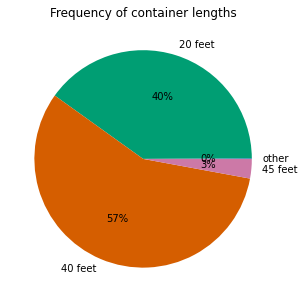

In [8]:
length_distribution_with_key_as_str_without_zeros = {
    key: value
    for (key, value) in length_distribution_with_key_as_str.items()
    if value > 0
}

plt.title("Frequency of container lengths")
plt.pie(
    list(length_distribution_with_key_as_str_without_zeros.values()),
    labels=list(length_distribution_with_key_as_str_without_zeros.keys()),
    autopct='%1.0f%%',
)
plt.gcf().set_size_inches(5, 5)
plt.show()

## Container Weight Distribution

The container weight of each container is drawn from a distribution.
For each container length, a different weight distribution can be provided.

In [9]:
container_weight_distribution_manager = conflowgen.ContainerWeightDistributionManager()

weight_distribution = container_weight_distribution_manager.get_container_weight_distribution()

weight_distribution

{<ContainerLength.twenty_feet: 20>: {2: 0.03225806451612903,
  4: 0.03225806451612903,
  6: 0.06451612903225806,
  8: 0.08064516129032258,
  10: 0.08064516129032258,
  12: 0.0967741935483871,
  14: 0.0967741935483871,
  16: 0.0967741935483871,
  18: 0.08064516129032258,
  20: 0.08064516129032258,
  22: 0.06451612903225806,
  24: 0.06451612903225806,
  26: 0.06451612903225806,
  28: 0.03225806451612903,
  30: 0.03225806451612903},
 <ContainerLength.forty_feet: 40>: {2: 0.0,
  4: 0.028985507246376812,
  6: 0.07246376811594203,
  8: 0.08695652173913043,
  10: 0.13043478260869565,
  12: 0.15942028985507245,
  14: 0.15942028985507245,
  16: 0.13043478260869565,
  18: 0.057971014492753624,
  20: 0.043478260869565216,
  22: 0.043478260869565216,
  24: 0.043478260869565216,
  26: 0.014492753623188406,
  28: 0.014492753623188406,
  30: 0.014492753623188406},
 <ContainerLength.forty_five_feet: 45>: {2: 0.0,
  4: 0.028985507246376812,
  6: 0.07246376811594203,
  8: 0.08695652173913043,
  10: 0.13

By visualizing the previous distribution with matplotlib, it is easier to make sense of it.

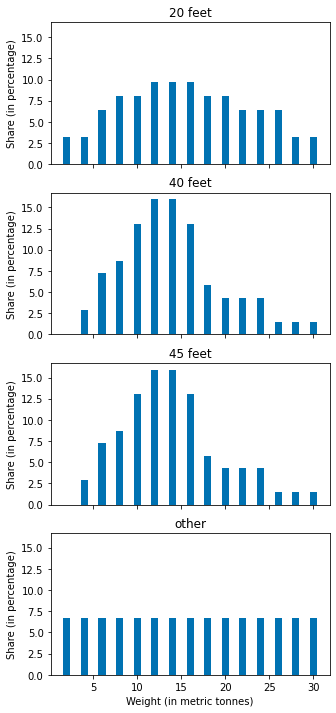

In [10]:
fig, axes = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(5, 12))

for ax, container_length in zip(axes, list(conflowgen.ContainerLength)):
    x, y = zip(*weight_distribution[container_length].items())
    ax.title.set_text(str(container_length))
    ax.bar(x, [i * 100 for i in y])
    ax.set_ylabel("Share (in percentage)")

plt.xlabel("Weight (in metric tonnes)")
plt.show()

The container weight distributions can only be overwritten all at once.
The values are automatically normalized by default.

In [11]:
container_weight_distribution_manager.set_container_weight_distribution(
    {
        conflowgen.ContainerLength.twenty_feet: {
            10: 20,
            20: 50,
            30: 30
        },
        conflowgen.ContainerLength.forty_feet: {
            10: 15,
            20: 50,
            30: 35
        },
        conflowgen.ContainerLength.forty_five_feet: {
            10: 10,
            20: 5,
            30: 85
        },
        conflowgen.ContainerLength.other: {
            10: 1,
            20: 1,
            30: 1
        }
    }
)

Sum of fractions was not 1 for '20 feet' and was automatically normalized.
Sum of fractions was not 1 for '40 feet' and was automatically normalized.
Sum of fractions was not 1 for '45 feet' and was automatically normalized.
Sum of fractions was not 1 for 'other' and was automatically normalized.


From now on, ConFlowGen uses the new container weight distribution:

In [12]:
container_weight_distribution_manager.get_container_weight_distribution()

{<ContainerLength.twenty_feet: 20>: {10: 0.2, 20: 0.5, 30: 0.3},
 <ContainerLength.forty_feet: 40>: {10: 0.15, 20: 0.5, 30: 0.35},
 <ContainerLength.forty_five_feet: 45>: {10: 0.1, 20: 0.05, 30: 0.85},
 <ContainerLength.other: -1>: {10: 0.3333333333333333,
  20: 0.3333333333333333,
  30: 0.3333333333333333}}

## Container Storage Requirement Distribution

The storage requirement of each container is drawn from a distribution. For each container length, a different storage requirement distribution can be provided.

The container storage requirement distribution is obtained with the following lines of code:

In [13]:
container_storage_manager = conflowgen.ContainerStorageRequirementDistributionManager()

storage_requirement_distribution = container_storage_manager.get_storage_requirement_distribution()

storage_requirement_distribution

{<ContainerLength.twenty_feet: 20>: {<StorageRequirement.empty: 'empty'>: 0.12,
  <StorageRequirement.standard: 'standard'>: 0.7290000000000001,
  <StorageRequirement.reefer: 'reefer'>: 0.07,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.08100000000000002},
 <ContainerLength.forty_feet: 40>: {<StorageRequirement.empty: 'empty'>: 0.12,
  <StorageRequirement.standard: 'standard'>: 0.7290000000000001,
  <StorageRequirement.reefer: 'reefer'>: 0.07,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.08100000000000002},
 <ContainerLength.forty_five_feet: 45>: {<StorageRequirement.empty: 'empty'>: 0.12,
  <StorageRequirement.standard: 'standard'>: 0.7290000000000001,
  <StorageRequirement.reefer: 'reefer'>: 0.07,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.08100000000000002},
 <ContainerLength.other: -1>: {<StorageRequirement.empty: 'empty'>: 0.12,
  <StorageRequirement.standard: 'standard'>: 0.7290000000000001,
  <StorageRequirement.reefer: 'reefer'>

This can be visualized e.g. with the help of one pie chart for each container length.

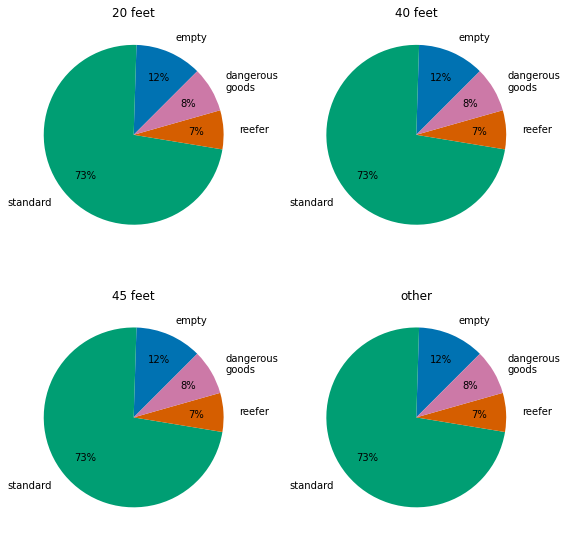

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes = list(itertools.chain(*axes))

for ax, container_length in zip(axes, list(conflowgen.ContainerLength)):
    keys, values = zip(*storage_requirement_distribution[container_length].items())
    labels = list(map(lambda x: str(x).replace("_", "\n"), keys))
    ax.title.set_text(str(container_length))
    ax.pie(
        [i * 100 for i in values],
        labels=labels,
        autopct='%1.0f%%',
        pctdistance=0.7,
        labeldistance=1.18,
        startangle=45
    )

plt.tight_layout()
plt.show()

The container storage distributions can only be overwritten all at once. The values are automatically normalized by default.

In [15]:
container_storage_manager.set_storage_requirement_distribution(
    {
        conflowgen.ContainerLength.twenty_feet: {
            conflowgen.StorageRequirement.empty: 0.3,
            conflowgen.StorageRequirement.standard: 0.5,
            conflowgen.StorageRequirement.reefer: 0.1,
            conflowgen.StorageRequirement.dangerous_goods: 0.1
        },
        conflowgen.ContainerLength.forty_feet: {
            conflowgen.StorageRequirement.empty: 0.2,
            conflowgen.StorageRequirement.standard: 0.45,
            conflowgen.StorageRequirement.reefer: 0.2,
            conflowgen.StorageRequirement.dangerous_goods: 0.15
        },
        conflowgen.ContainerLength.forty_five_feet: {
            conflowgen.StorageRequirement.empty: 0.2,
            conflowgen.StorageRequirement.standard: 0.7,
            conflowgen.StorageRequirement.reefer: 0.05,
            conflowgen.StorageRequirement.dangerous_goods: 0.05
        },
        conflowgen.ContainerLength.other: {
            conflowgen.StorageRequirement.empty: 0.25,
            conflowgen.StorageRequirement.standard: 0.4,
            conflowgen.StorageRequirement.reefer: 0.25,
            conflowgen.StorageRequirement.dangerous_goods: 0.1
        }
    }
)

From now on, ConFlowGen uses the new distribution.

In [16]:
container_storage_manager.get_storage_requirement_distribution()

{<ContainerLength.twenty_feet: 20>: {<StorageRequirement.empty: 'empty'>: 0.3,
  <StorageRequirement.standard: 'standard'>: 0.5,
  <StorageRequirement.reefer: 'reefer'>: 0.1,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.1},
 <ContainerLength.forty_feet: 40>: {<StorageRequirement.empty: 'empty'>: 0.2,
  <StorageRequirement.standard: 'standard'>: 0.45,
  <StorageRequirement.reefer: 'reefer'>: 0.2,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.15},
 <ContainerLength.forty_five_feet: 45>: {<StorageRequirement.empty: 'empty'>: 0.2,
  <StorageRequirement.standard: 'standard'>: 0.7,
  <StorageRequirement.reefer: 'reefer'>: 0.05,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.05},
 <ContainerLength.other: -1>: {<StorageRequirement.empty: 'empty'>: 0.25,
  <StorageRequirement.standard: 'standard'>: 0.4,
  <StorageRequirement.reefer: 'reefer'>: 0.25,
  <StorageRequirement.dangerous_goods: 'dangerous_goods'>: 0.1}}

## Mode of Transport Distribution

The mode of transport for each container is drawn from a distribution.

The mode of transport distribution is obtained by the following code:

In [17]:
mode_of_transport = conflowgen.ModeOfTransportDistributionManager()

mode_of_transport_distribution = mode_of_transport.get_mode_of_transport_distribution()

mode_of_transport_distribution

{<ModeOfTransport.truck: 'truck'>: {<ModeOfTransport.truck: 'truck'>: 0,
  <ModeOfTransport.train: 'train'>: 0,
  <ModeOfTransport.feeder: 'feeder'>: 0.29814814814814816,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.7018518518518518,
  <ModeOfTransport.barge: 'barge'>: 0},
 <ModeOfTransport.train: 'train'>: {<ModeOfTransport.truck: 'truck'>: 0,
  <ModeOfTransport.train: 'train'>: 0,
  <ModeOfTransport.feeder: 'feeder'>: 0.29814814814814816,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.7018518518518518,
  <ModeOfTransport.barge: 'barge'>: 0},
 <ModeOfTransport.feeder: 'feeder'>: {<ModeOfTransport.truck: 'truck'>: 0.14985969311600694,
  <ModeOfTransport.train: 'train'>: 0.14030688399307423,
  <ModeOfTransport.feeder: 'feeder'>: 0,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.7089975520926622,
  <ModeOfTransport.barge: 'barge'>: 0.0008358707982566125},
 <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: {<ModeOfTransport.truck: 'truck'>: 0.3617122

The mode of transport distributions can only be overwritten all at once. The values are automatically normalized by default.

In [18]:
mode_of_transport.set_mode_of_transport_distribution(
    {
        conflowgen.ModeOfTransport.feeder: {
            conflowgen.ModeOfTransport.train: 0.2,
            conflowgen.ModeOfTransport.truck: 0.1,
            conflowgen.ModeOfTransport.barge: 0.1,
            conflowgen.ModeOfTransport.feeder: 0.4,
            conflowgen.ModeOfTransport.deep_sea_vessel: 0.2
        },
        conflowgen.ModeOfTransport.truck: {
            conflowgen.ModeOfTransport.train: 0.15,
            conflowgen.ModeOfTransport.truck: 0.45,
            conflowgen.ModeOfTransport.barge: 0.1,
            conflowgen.ModeOfTransport.feeder: 0.2,
            conflowgen.ModeOfTransport.deep_sea_vessel: 0.1
        },
        conflowgen.ModeOfTransport.barge: {
            conflowgen.ModeOfTransport.train: 0.2,
            conflowgen.ModeOfTransport.truck: 0.15,
            conflowgen.ModeOfTransport.barge: 0.25,
            conflowgen.ModeOfTransport.feeder: 0.1,
            conflowgen.ModeOfTransport.deep_sea_vessel: 0.3
        },
        conflowgen.ModeOfTransport.deep_sea_vessel: {
            conflowgen.ModeOfTransport.train: 0.25,
            conflowgen.ModeOfTransport.truck: 0.1,
            conflowgen.ModeOfTransport.barge: 0.2,
            conflowgen.ModeOfTransport.feeder: 0.15,
            conflowgen.ModeOfTransport.deep_sea_vessel: 0.3
        },
        conflowgen.ModeOfTransport.train: {
            conflowgen.ModeOfTransport.train: 0.3,
            conflowgen.ModeOfTransport.truck: 0.1,
            conflowgen.ModeOfTransport.barge: 0.15,
            conflowgen.ModeOfTransport.feeder: 0.2,
            conflowgen.ModeOfTransport.deep_sea_vessel: 0.25
        }
    }
)

From now on, ConFlowGen uses the new distribution.

In [19]:
mode_of_transport.get_mode_of_transport_distribution()

{<ModeOfTransport.truck: 'truck'>: {<ModeOfTransport.truck: 'truck'>: 0.45,
  <ModeOfTransport.train: 'train'>: 0.15,
  <ModeOfTransport.feeder: 'feeder'>: 0.2,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.1,
  <ModeOfTransport.barge: 'barge'>: 0.1},
 <ModeOfTransport.train: 'train'>: {<ModeOfTransport.truck: 'truck'>: 0.1,
  <ModeOfTransport.train: 'train'>: 0.3,
  <ModeOfTransport.feeder: 'feeder'>: 0.2,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.25,
  <ModeOfTransport.barge: 'barge'>: 0.15},
 <ModeOfTransport.feeder: 'feeder'>: {<ModeOfTransport.truck: 'truck'>: 0.09999999999999998,
  <ModeOfTransport.train: 'train'>: 0.19999999999999996,
  <ModeOfTransport.feeder: 'feeder'>: 0.3999999999999999,
  <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: 0.19999999999999996,
  <ModeOfTransport.barge: 'barge'>: 0.09999999999999998},
 <ModeOfTransport.deep_sea_vessel: 'deep_sea_vessel'>: {<ModeOfTransport.truck: 'truck'>: 0.1,
  <ModeOfTransport.train: 'train'>

## Truck Arrival Distribution Manager

Each truck arrival time is drawn from a distribution.

Truck arrival distribution is obtained by the following code:

In [20]:
truck_arrival_distribution_manager = conflowgen.TruckArrivalDistributionManager()

truck_arrival_distribution = truck_arrival_distribution_manager.get_truck_arrival_distribution()

truck_arrival_distribution

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0039591265543534575,
 6: 0.008280755354708402,
 7: 0.00787052138708076,
 8: 0.009048448164603814,
 9: 0.010653252222483504,
 10: 0.012752141622641803,
 11: 0.016642037255734387,
 12: 0.014028517880762,
 13: 0.014804115031537253,
 14: 0.014974413128949352,
 15: 0.011139325718994135,
 16: 0.013892795598075644,
 17: 0.01082340227148447,
 18: 0.008328057746798652,
 19: 0.006987426702627708,
 20: 0.005148702946956847,
 21: 0.0030022110241690898,
 22: 0.0022556664886468924,
 23: 0.002490824815783658,
 24: 0.001903829363512033,
 25: 0.0021963463393818504,
 26: 0.001702371138626582,
 27: 0.0021438383478597847,
 28: 0.0024202228363111615,
 29: 0.006458109051981418,
 30: 0.009296920847765565,
 31: 0.008129901930327036,
 32: 0.009348584294496615,
 33: 0.011340930095712323,
 34: 0.013698448606867216,
 35: 0.01296799663104594,
 36: 0.015331193639106963,
 37: 0.014188986240397503,
 38: 0.014878231656167027,
 39: 0.01218616653188358,
 40: 0.012107579

With a few lines of matplotlib code, the truck arrival pattern is visualized.

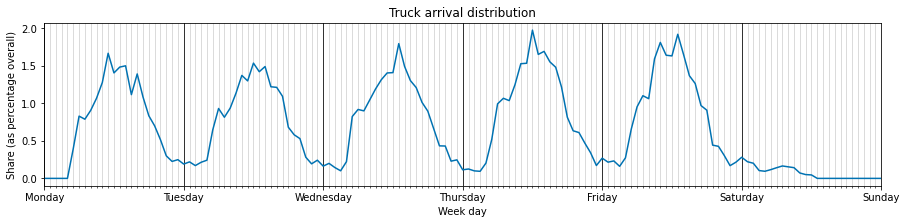

In [21]:
hour_in_week, fraction = zip(*list(sorted(truck_arrival_distribution.items())))
weekday_in_week = [x / 24 + 1 for x in hour_in_week]
percentage = [x * 100 for x in fraction]

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(weekday_in_week, percentage)
plt.xlim([1, 7])  # plot from Monday to Sunday
ax.xaxis.grid(True, which='minor', color='lightgray')  # every hour
ax.xaxis.grid(True, which='major', color='k')  # every day
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1 / 24))  # every hour

plt.title("Truck arrival distribution")
ax.set_xticks([i for i in range(1, 8)])  # every day
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Week day")
plt.ylabel("Share (as percentage overall)")

plt.show()

A second default distribution exists.
You need to provide the corresponding keyword when creating the new SQLite database to use it.

Thee pattern looks slightly different - the peaks during lunch time are smoothened.

Closing current database connection.
Opening file :memory:
journal_mode: memory
cache_size: -32768
page_size: 4096
foreign_keys: 1
Creating new database at :memory:
Creating all tables...
Seed with default values...


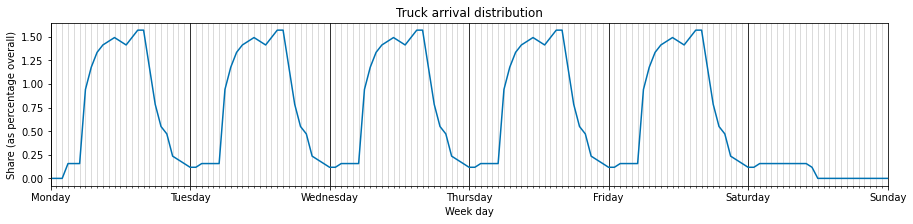

In [22]:
database_chooser.close_current_connection()

database_chooser.create_new_sqlite_database(
    ":memory:",
    assume_tas=True
)

truck_arrival_distribution = truck_arrival_distribution_manager.get_truck_arrival_distribution()

hour_in_week, fraction = zip(*list(sorted(truck_arrival_distribution.items())))
weekday_in_week = [x / 24 + 1 for x in hour_in_week]
percentage = [x * 100 for x in fraction]

fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(weekday_in_week, percentage)
plt.xlim([1, 7])  # plot from Monday to Sunday
ax.xaxis.grid(True, which='minor', color='lightgray')  # every hour
ax.xaxis.grid(True, which='major', color='k')  # every day
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1 / 24))  # every hour

plt.title("Truck arrival distribution")
ax.set_xticks([i for i in range(1, 8)])  # every day
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Week day")
plt.ylabel("Share (as percentage overall)")

plt.show()

The truck arrival distributions can only be overwritten for the whole week at once.
Each key represents the hour in the week and each value represents the probability of a truck to arrive between that hour and the start of the next time slot.

In [23]:
truck_arrival_distribution_manager.set_truck_arrival_distribution(
    {
        0: 0.006944444444444444,
        1: 0.006944444444444444,
        2: 0.006944444444444444,
        3: 0.006944444444444444,
        4: 0.006944444444444444,
        5: 0.006944444444444444,
        6: 0.006944444444444444,
        7: 0.006944444444444444,
        8: 0.006944444444444444,
        9: 0.006944444444444444,
        10: 0.006944444444444444,
        11: 0.006944444444444444,
        12: 0.006944444444444444,
        13: 0.006944444444444444,
        14: 0.006944444444444444,
        15: 0.006944444444444444,
        16: 0.006944444444444444,
        17: 0.006944444444444444,
        18: 0.006944444444444444,
        19: 0.006944444444444444,
        20: 0.006944444444444444,
        21: 0.006944444444444444,
        22: 0.006944444444444444,
        23: 0.006944444444444444,
        24: 0.006944444444444444,
        25: 0.006944444444444444,
        26: 0.006944444444444444,
        27: 0.006944444444444444,
        28: 0.006944444444444444,
        29: 0.006944444444444444,
        30: 0.006944444444444444,
        31: 0.006944444444444444,
        32: 0.006944444444444444,
        33: 0.006944444444444444,
        34: 0.006944444444444444,
        35: 0.006944444444444444,
        36: 0.006944444444444444,
        37: 0.006944444444444444,
        38: 0.006944444444444444,
        39: 0.006944444444444444,
        40: 0.006944444444444444,
        41: 0.006944444444444444,
        42: 0.006944444444444444,
        43: 0.006944444444444444,
        44: 0.006944444444444444,
        45: 0.006944444444444444,
        46: 0.006944444444444444,
        47: 0.006944444444444444,
        48: 0.006944444444444444,
        49: 0.006944444444444444,
        50: 0.006944444444444444,
        51: 0.006944444444444444,
        52: 0.006944444444444444,
        53: 0.006944444444444444,
        54: 0.006944444444444444,
        55: 0.006944444444444444,
        56: 0.006944444444444444,
        57: 0.006944444444444444,
        58: 0.006944444444444444,
        59: 0.006944444444444444,
        60: 0.006944444444444444,
        61: 0.006944444444444444,
        62: 0.006944444444444444,
        63: 0.006944444444444444,
        64: 0.006944444444444444,
        65: 0.006944444444444444,
        66: 0.006944444444444444,
        67: 0.006944444444444444,
        68: 0.006944444444444444,
        69: 0.006944444444444444,
        70: 0.006944444444444444,
        71: 0.006944444444444444,
        72: 0.006944444444444444,
        73: 0.006944444444444444,
        74: 0.006944444444444444,
        75: 0.006944444444444444,
        76: 0.006944444444444444,
        77: 0.006944444444444444,
        78: 0.006944444444444444,
        79: 0.006944444444444444,
        80: 0.006944444444444444,
        81: 0.006944444444444444,
        82: 0.006944444444444444,
        83: 0.006944444444444444,
        84: 0.006944444444444444,
        85: 0.006944444444444444,
        86: 0.006944444444444444,
        87: 0.006944444444444444,
        88: 0.006944444444444444,
        89: 0.006944444444444444,
        90: 0.006944444444444444,
        91: 0.006944444444444444,
        92: 0.006944444444444444,
        93: 0.006944444444444444,
        94: 0.006944444444444444,
        95: 0.006944444444444444,
        96: 0.006944444444444444,
        97: 0.006944444444444444,
        98: 0.006944444444444444,
        99: 0.006944444444444444,
        100: 0.006944444444444444,
        101: 0.006944444444444444,
        102: 0.006944444444444444,
        103: 0.006944444444444444,
        104: 0.006944444444444444,
        105: 0.006944444444444444,
        106: 0.006944444444444444,
        107: 0.006944444444444444,
        108: 0.006944444444444444,
        109: 0.006944444444444444,
        110: 0.006944444444444444,
        111: 0.006944444444444444,
        112: 0.006944444444444444,
        113: 0.006944444444444444,
        114: 0.006944444444444444,
        115: 0.006944444444444444,
        116: 0.006944444444444444,
        117: 0.006944444444444444,
        118: 0.006944444444444444,
        119: 0.006944444444444444,
        120: 0.006944444444444444,
        121: 0.006944444444444444,
        122: 0.006944444444444444,
        123: 0.006944444444444444,
        124: 0.006944444444444444,
        125: 0.006944444444444444,
        126: 0.006944444444444444,
        127: 0.006944444444444444,
        128: 0.006944444444444444,
        129: 0.006944444444444444,
        130: 0.006944444444444444,
        131: 0.006944444444444444,
        132: 0.006944444444444444,
        133: 0.006944444444444444,
        134: 0.006944444444444444,
        135: 0.006944444444444444,
        136: 0.006944444444444444,
        137: 0.006944444444444444,
        138: 0.006944444444444444,
        139: 0.006944444444444444,
        140: 0.006944444444444444,
        141: 0.006944444444444444,
        142: 0.006944444444444444,
        143: 0.006944444444444444,
        144: 0.0,
        145: 0.0,
        146: 0.0,
        147: 0.0,
        148: 0.0,
        149: 0.0,
        150: 0.0,
        151: 0.0,
        152: 0.0,
        153: 0.0,
        154: 0.0,
        155: 0.0,
        156: 0.0,
        157: 0.0,
        158: 0.0,
        159: 0.0,
        160: 0.0,
        161: 0.0,
        162: 0.0,
        163: 0.0,
        164: 0.0,
        165: 0.0,
        166: 0.0,
        167: 0.0
    }
)

## Container Dwell Time Distribution

The container dwell time distribution is used in two cases.
First, the truck arrivals are made more likely whenever the container dwell time is close to its expected duration.
Second, a vehicle that arrives at the terminal close to the expected container dwell time is more likely to pick up the container.

### Standard Container

#### Truck

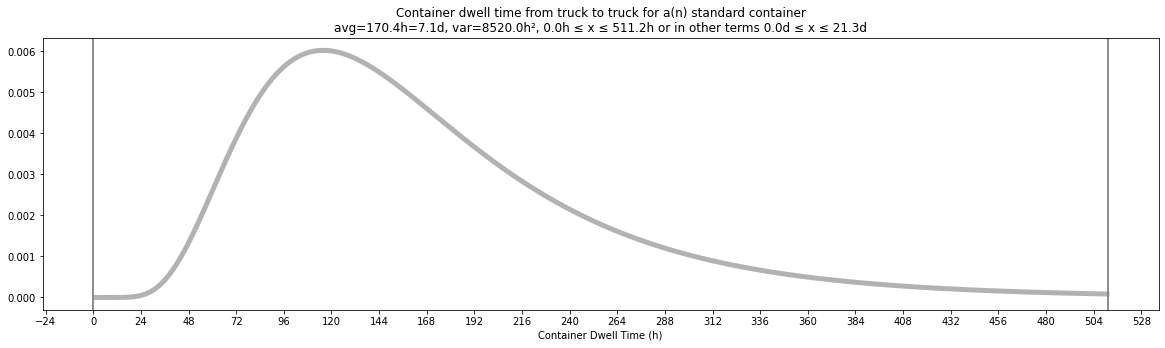

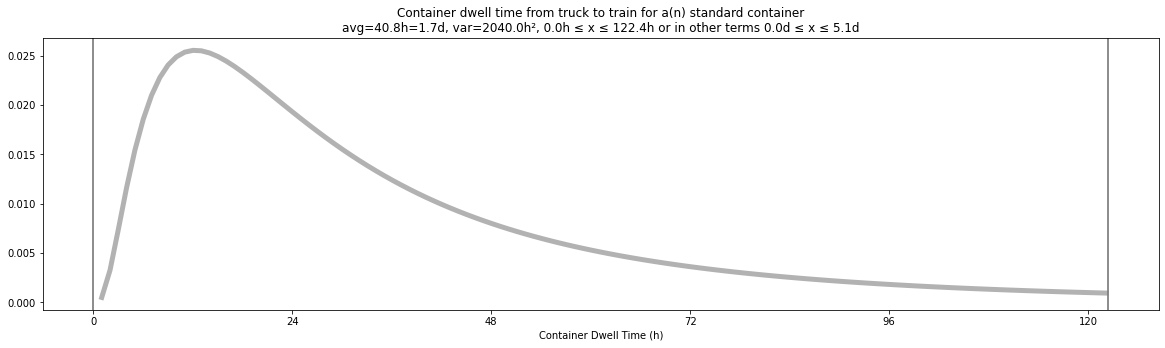

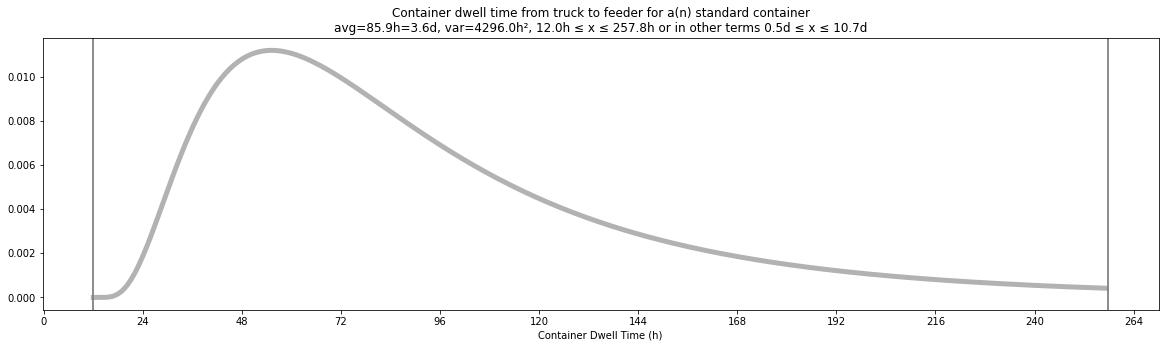

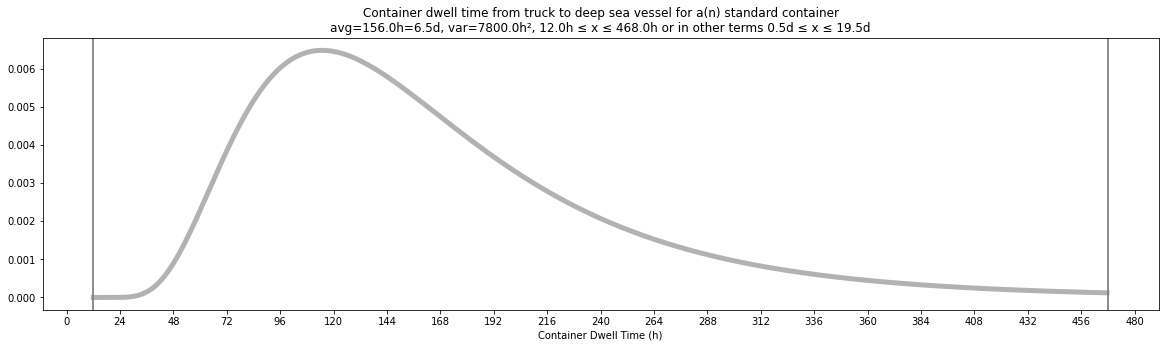

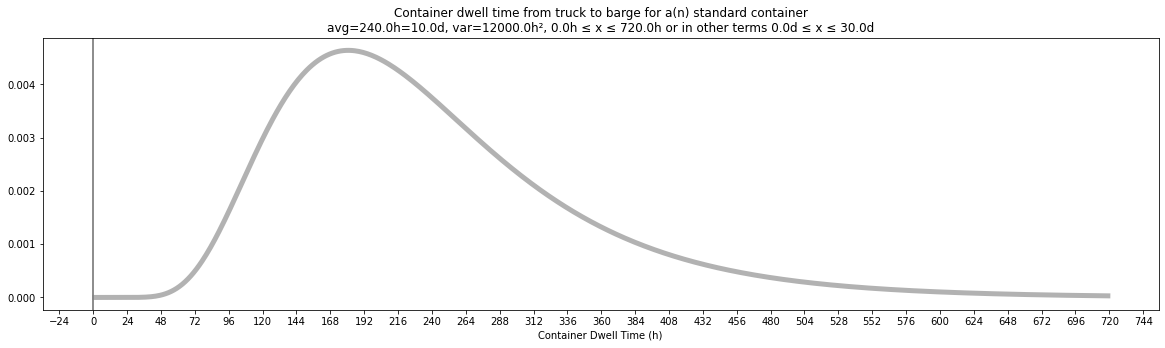

#### Train

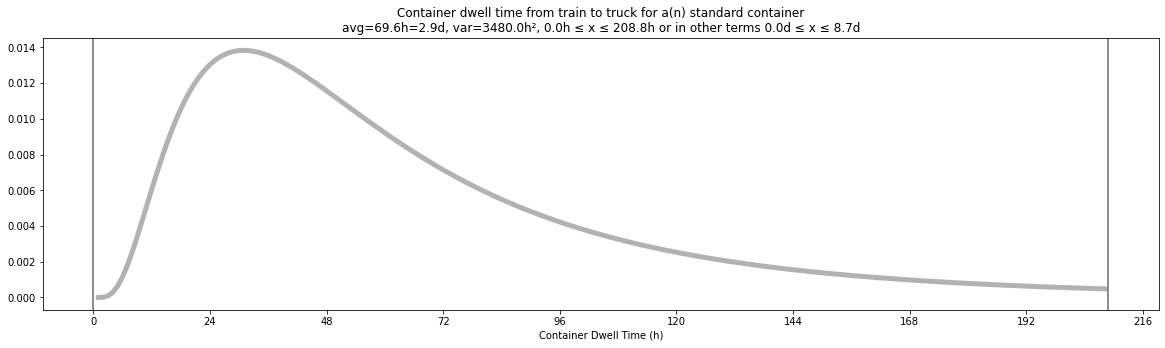

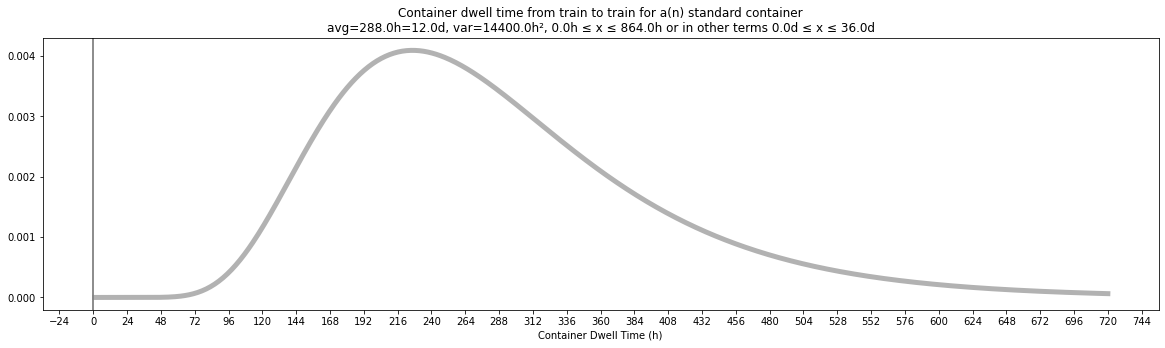

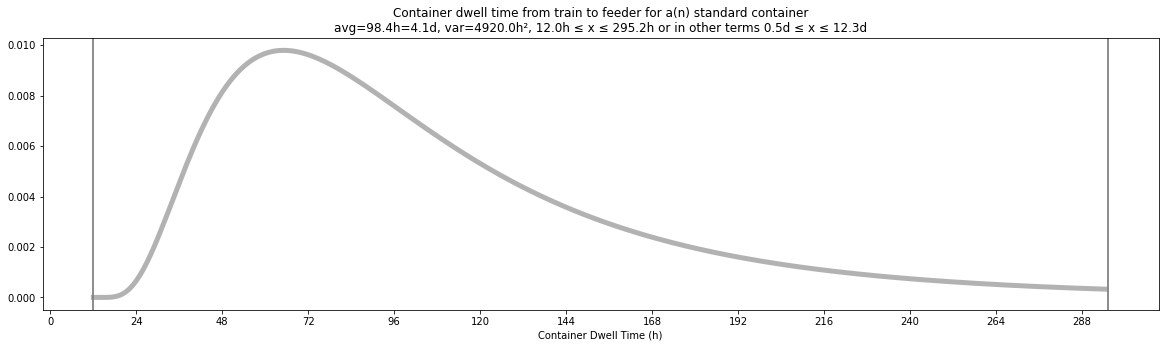

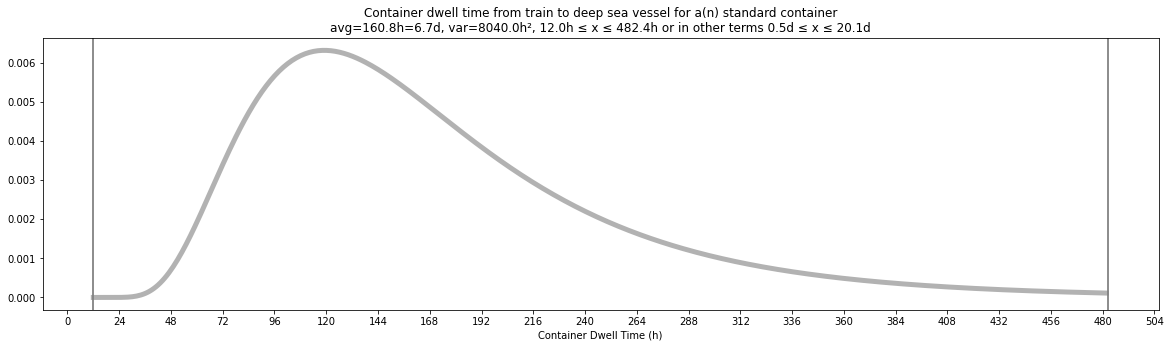

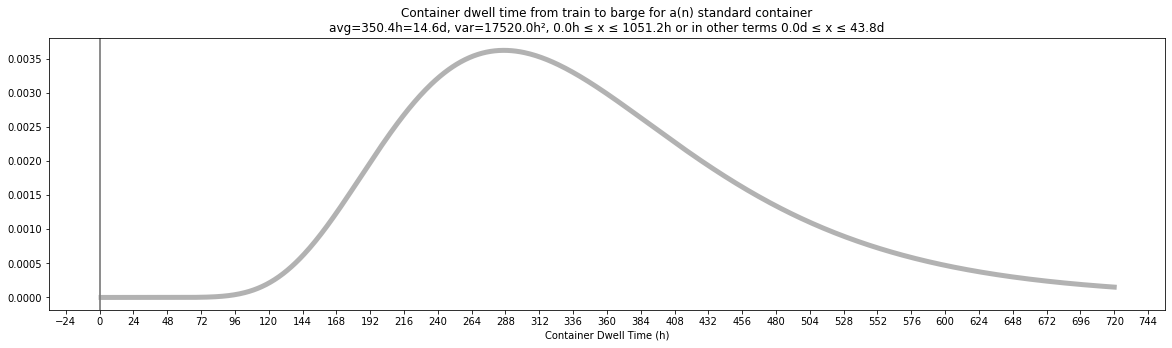

#### Feeder

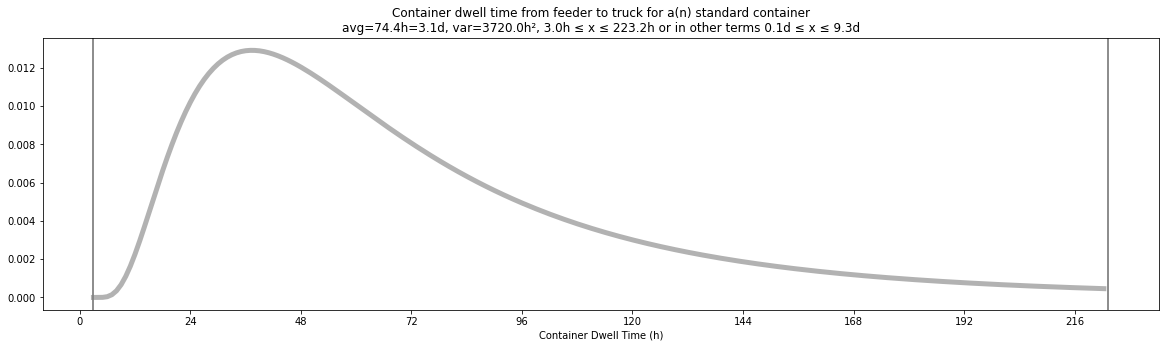

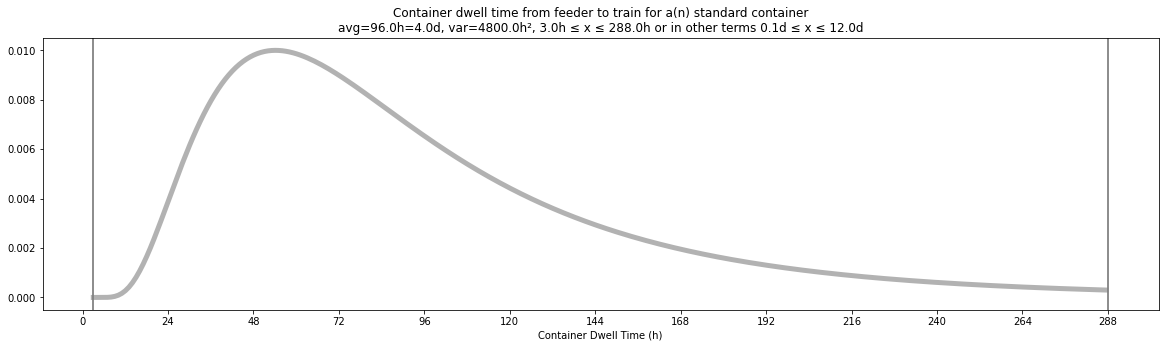

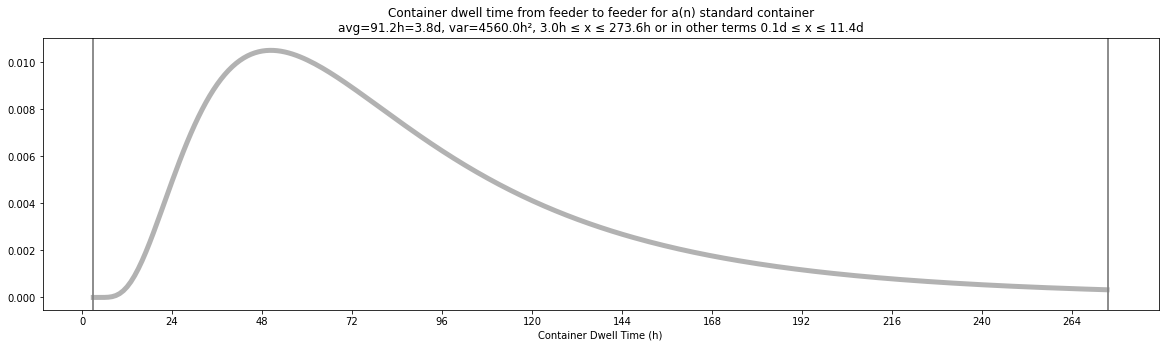

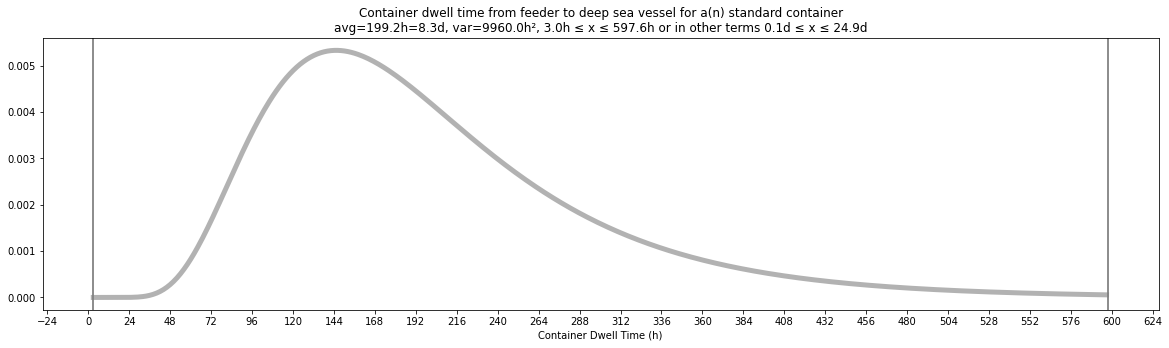

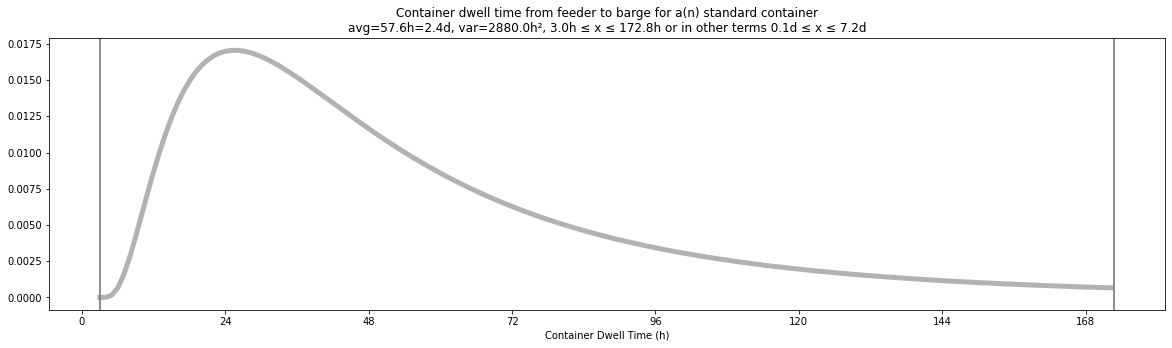

#### Deep Sea Vessel

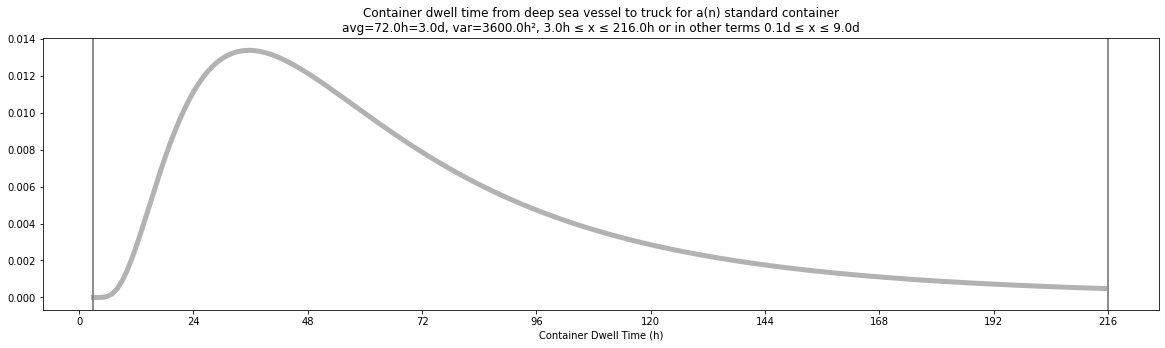

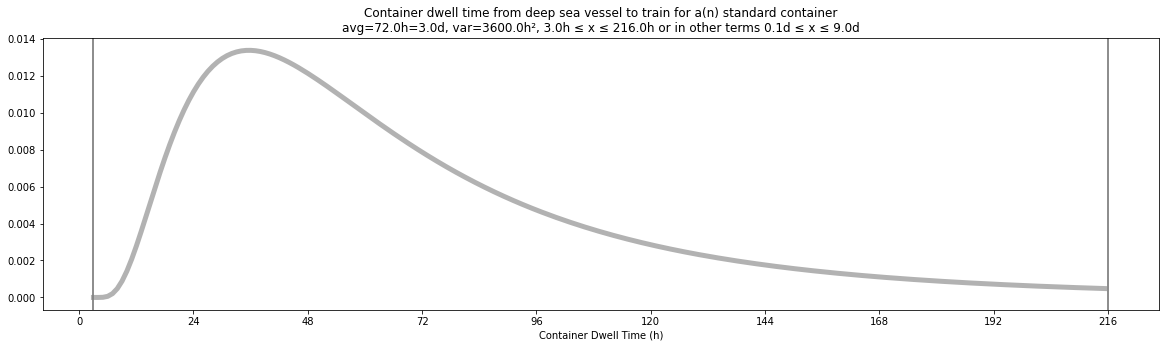

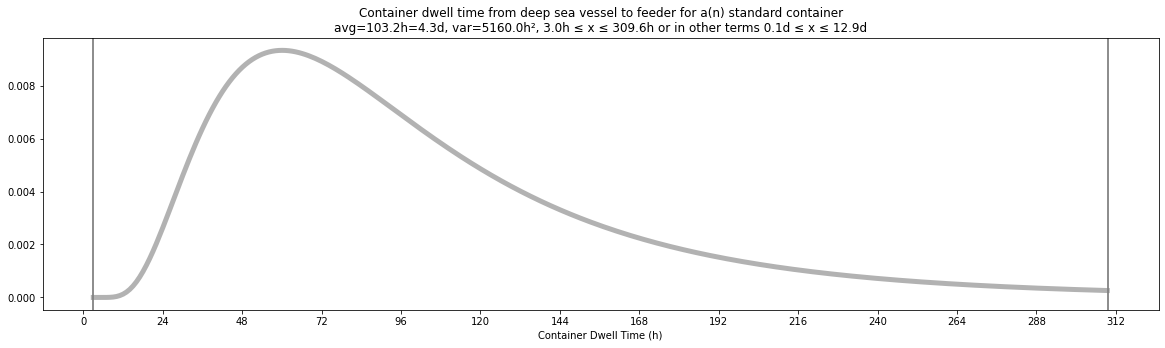

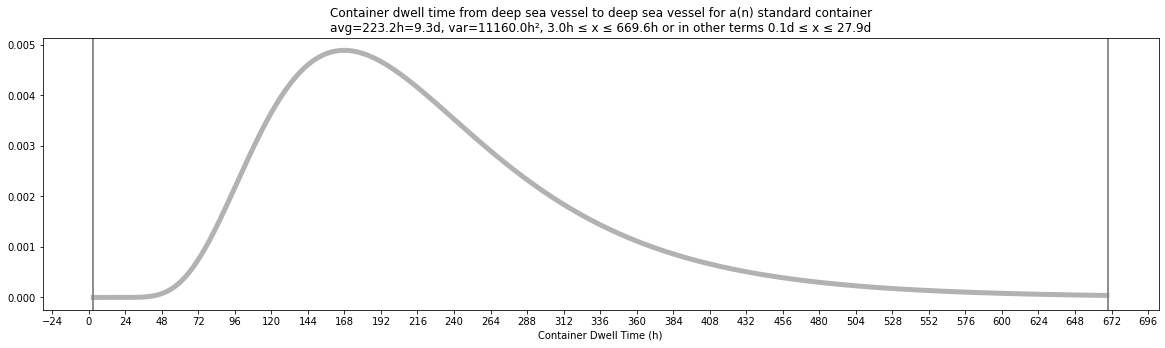

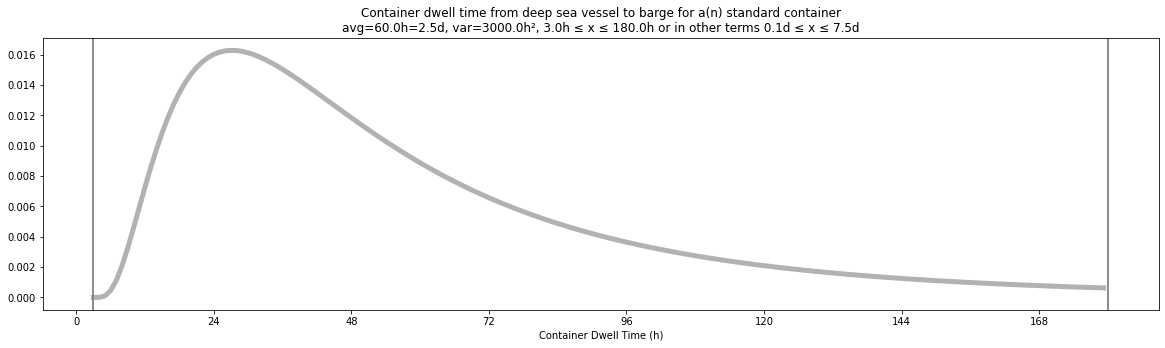

#### Barge

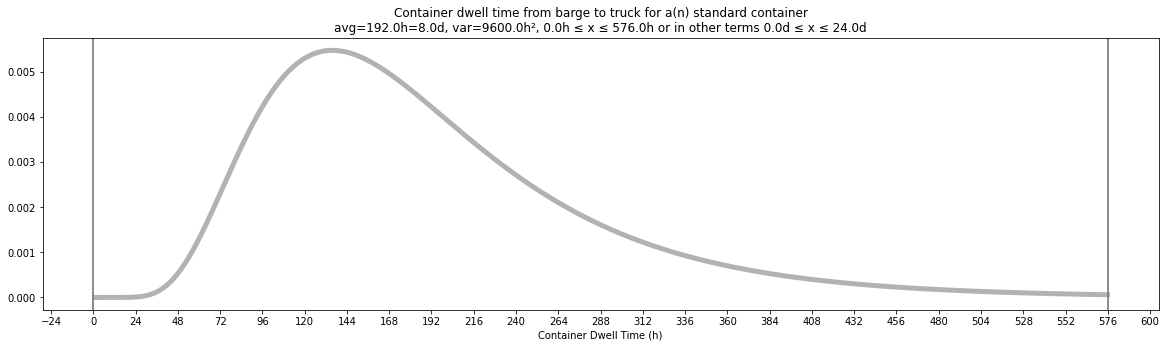

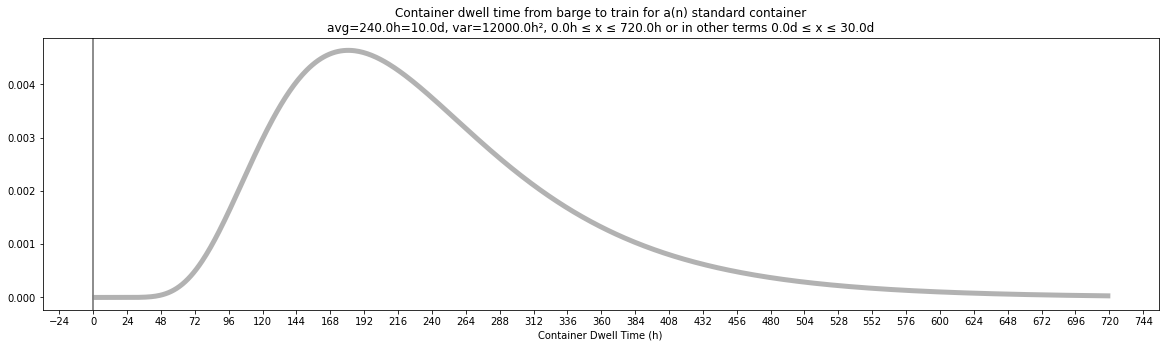

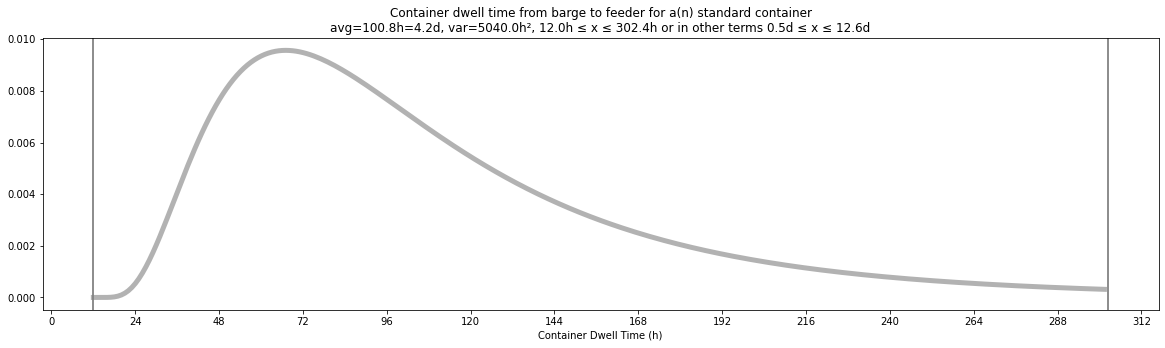

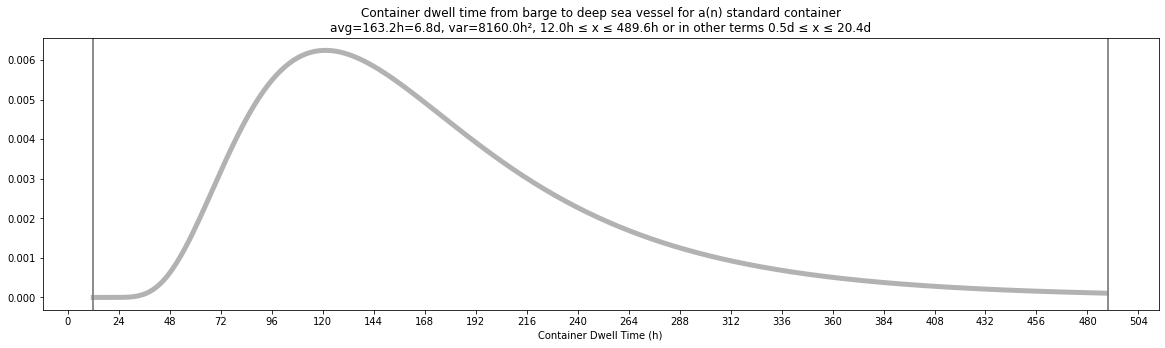

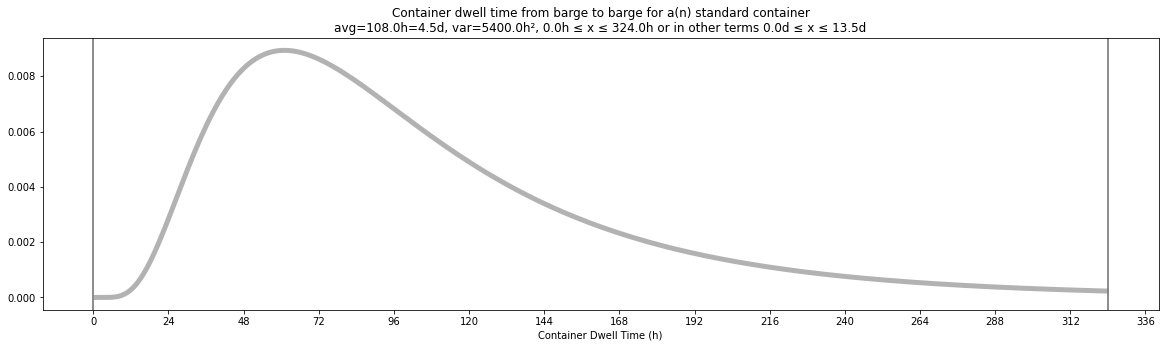

### Empty Container

#### Truck

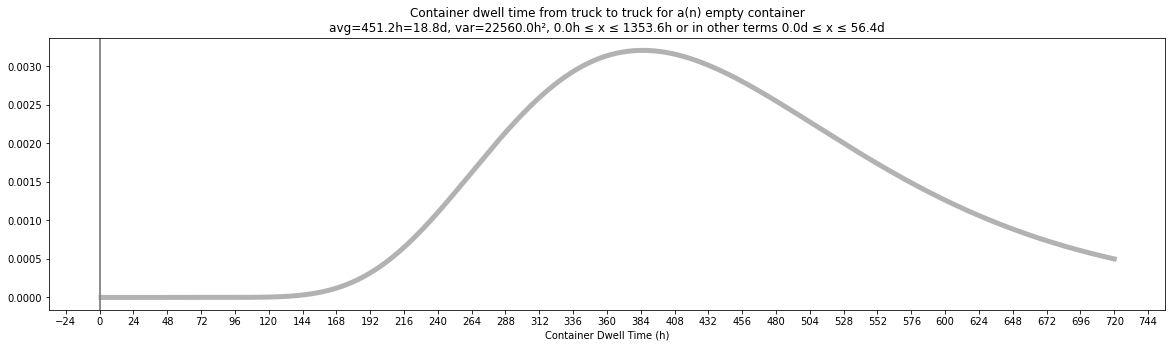

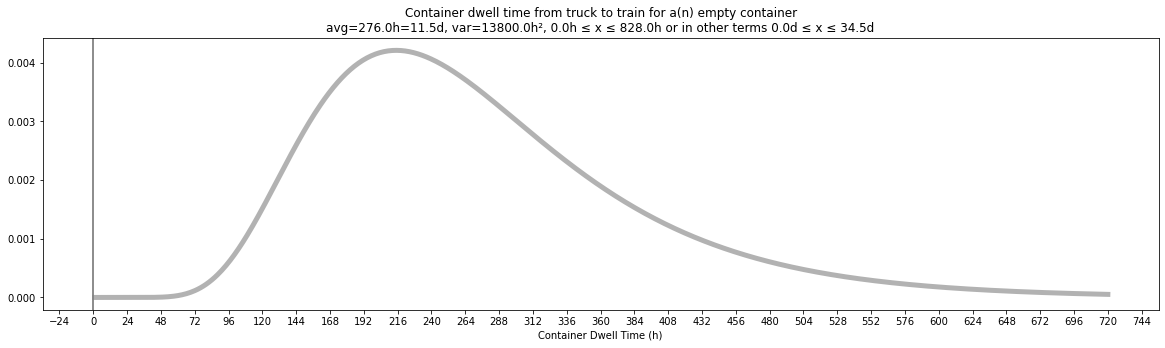

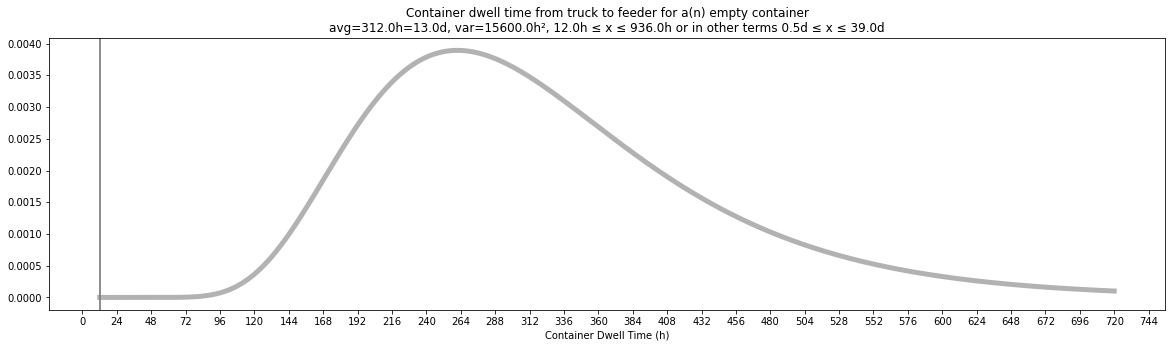

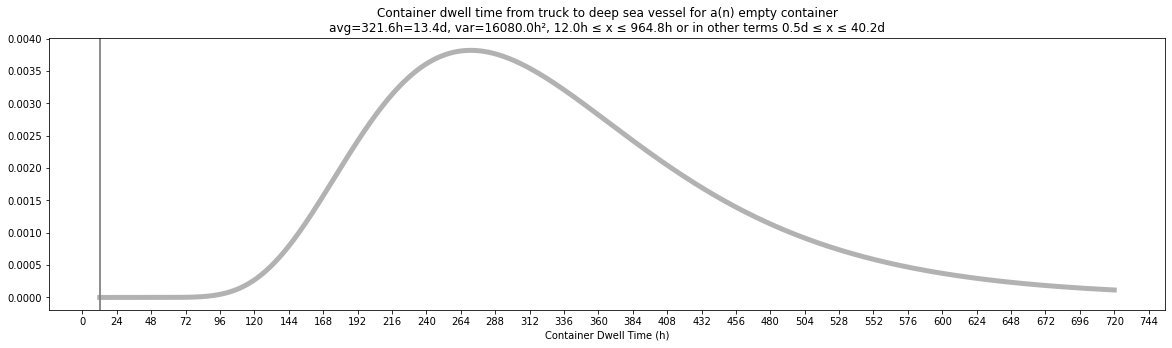

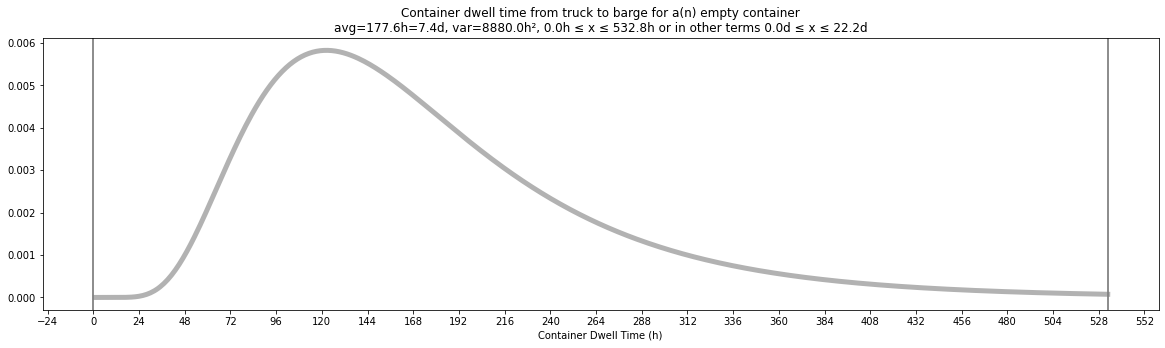

#### Train

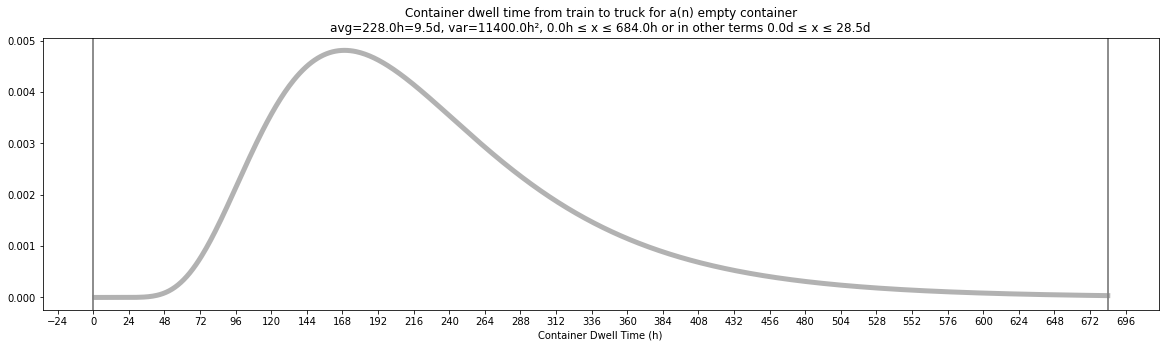

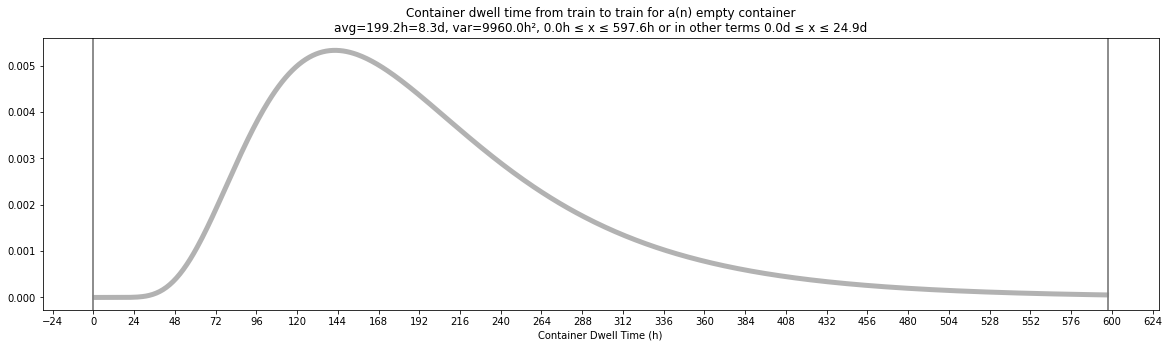

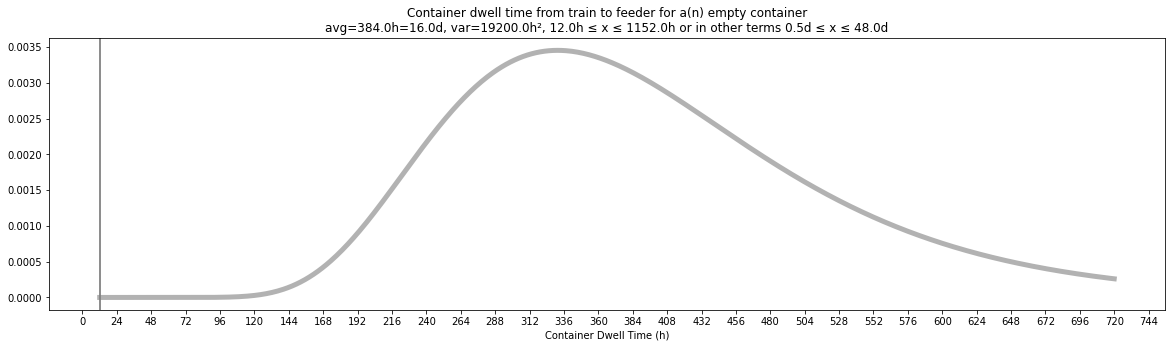

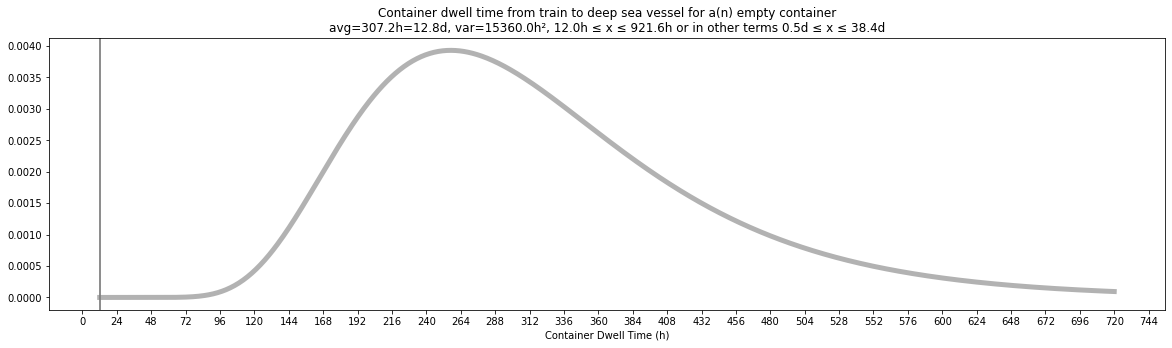

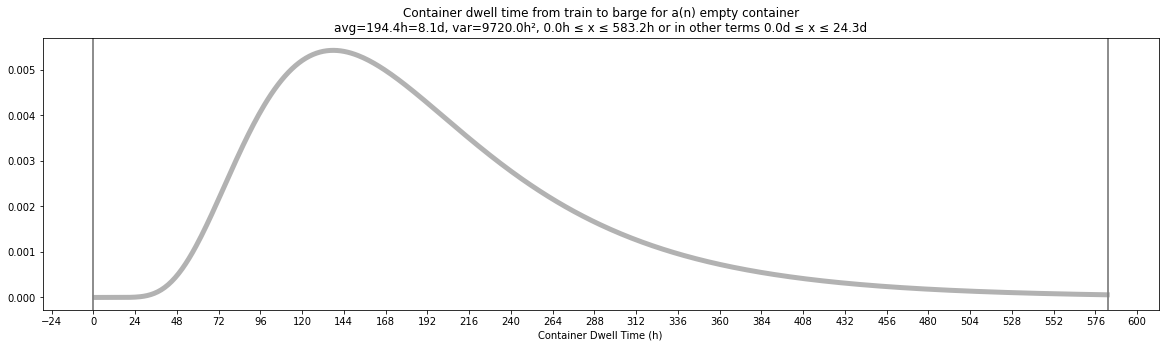

#### Feeder

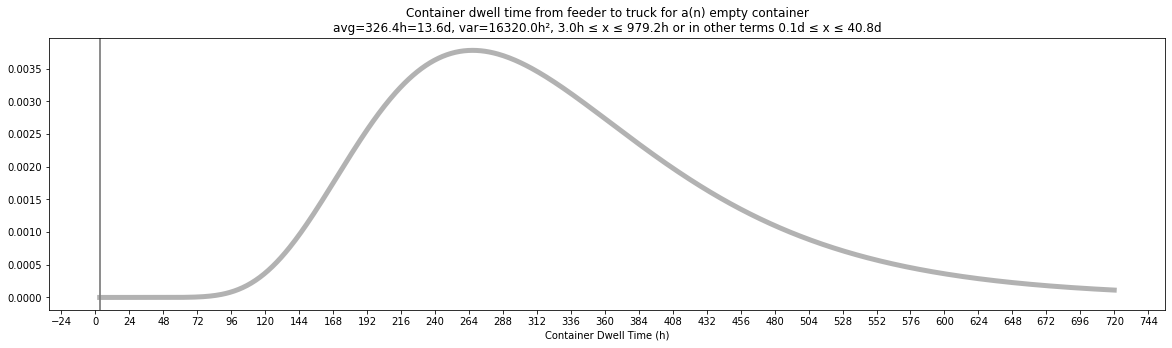

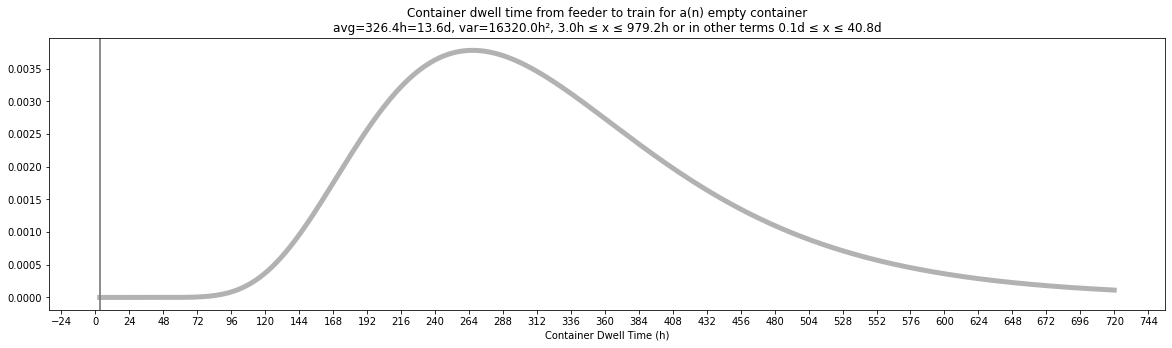

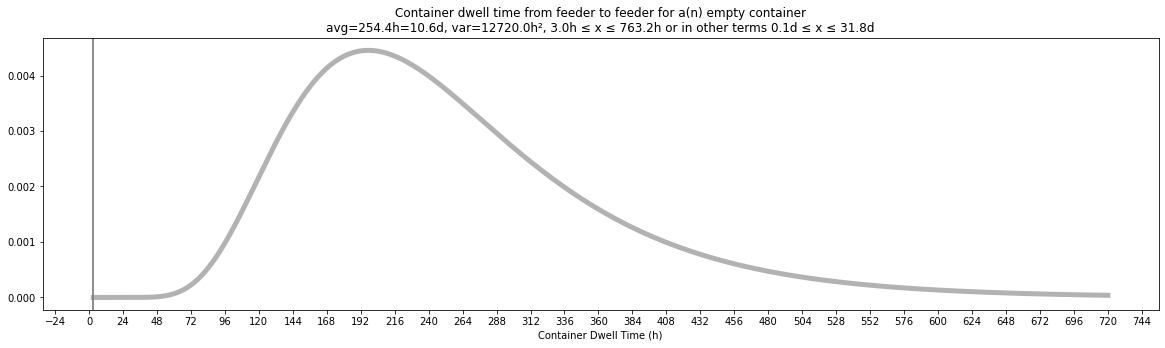

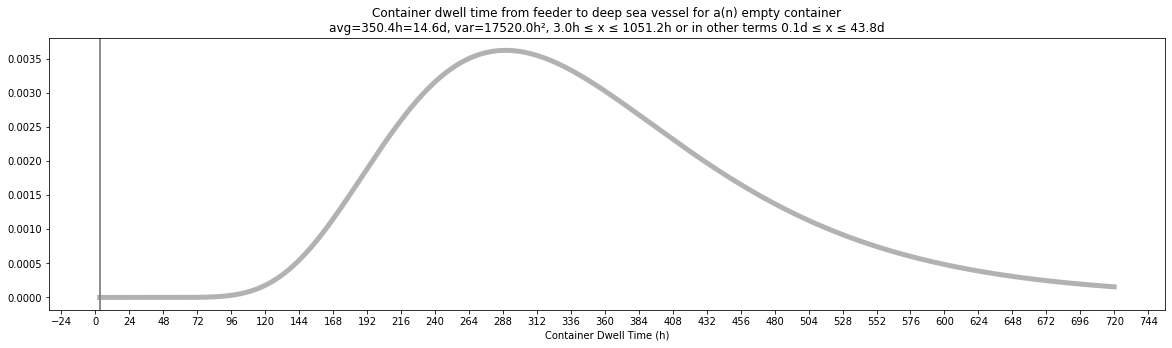

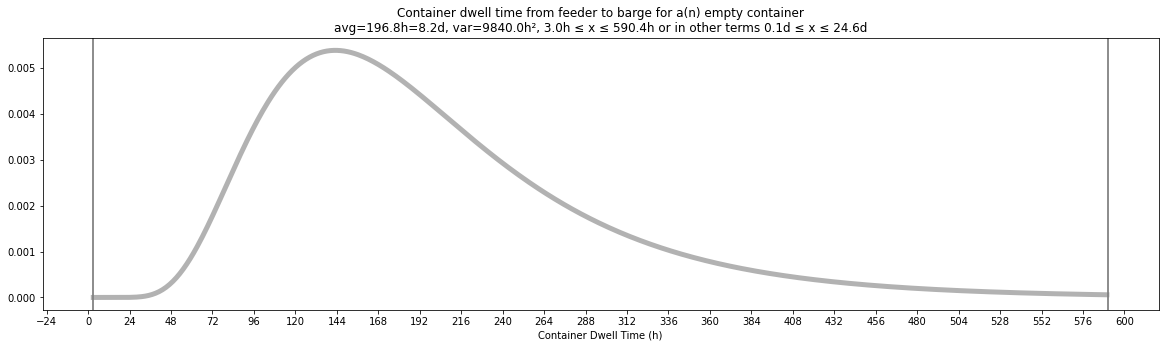

#### Deep Sea Vessel

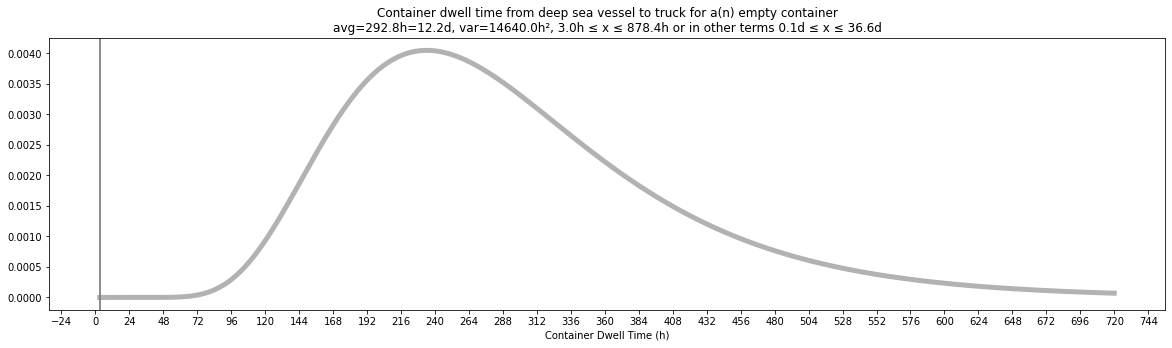

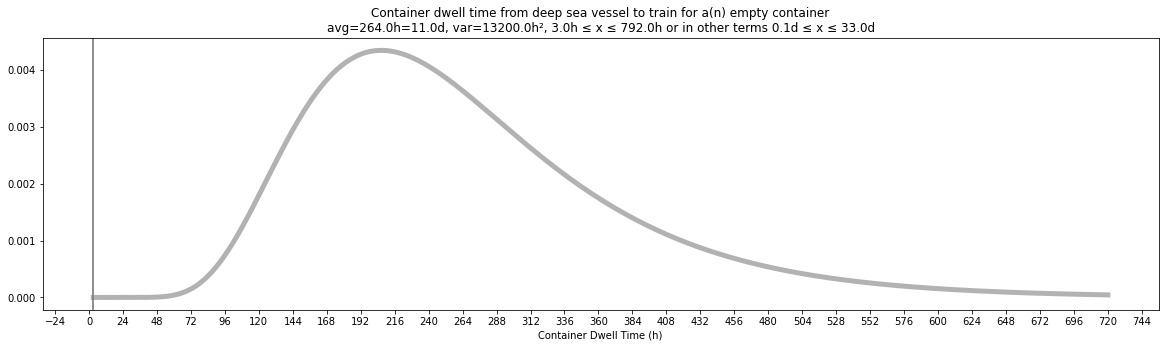

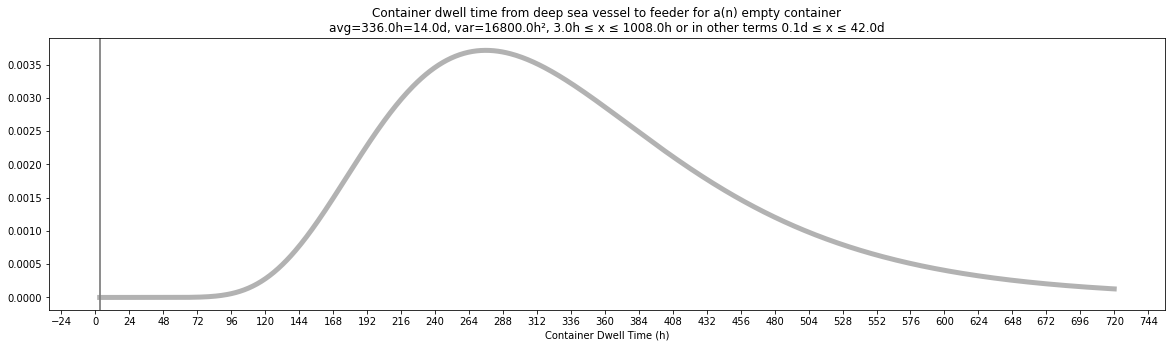

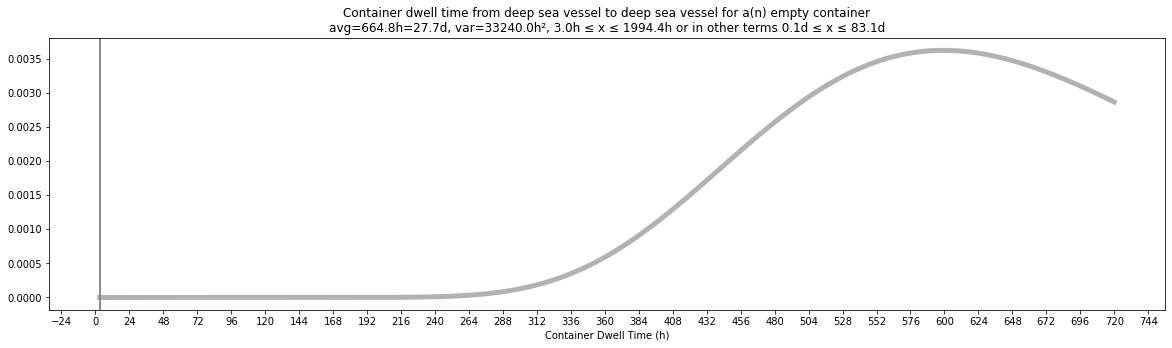

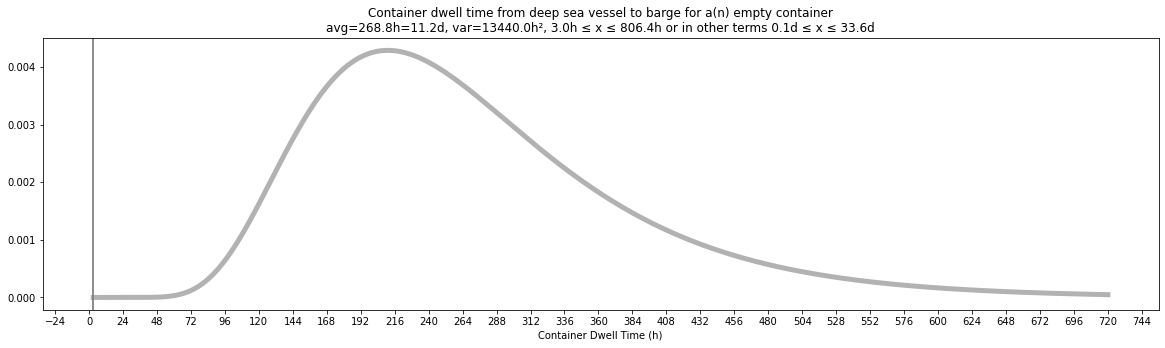

#### Barge

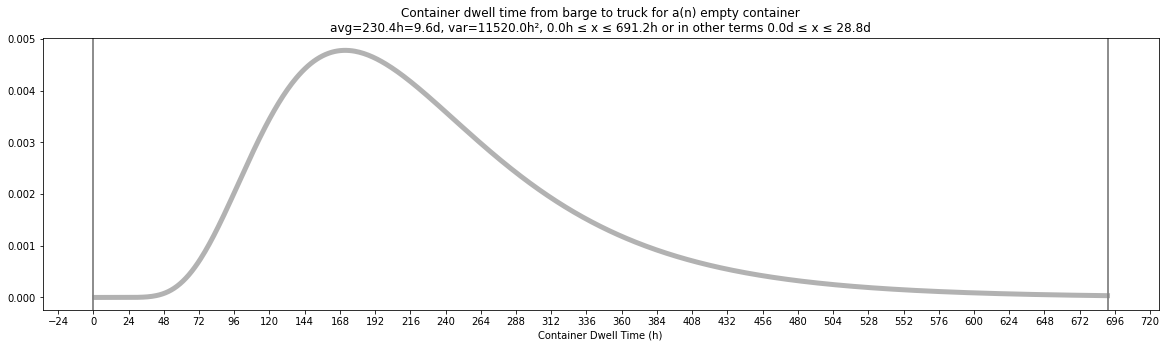

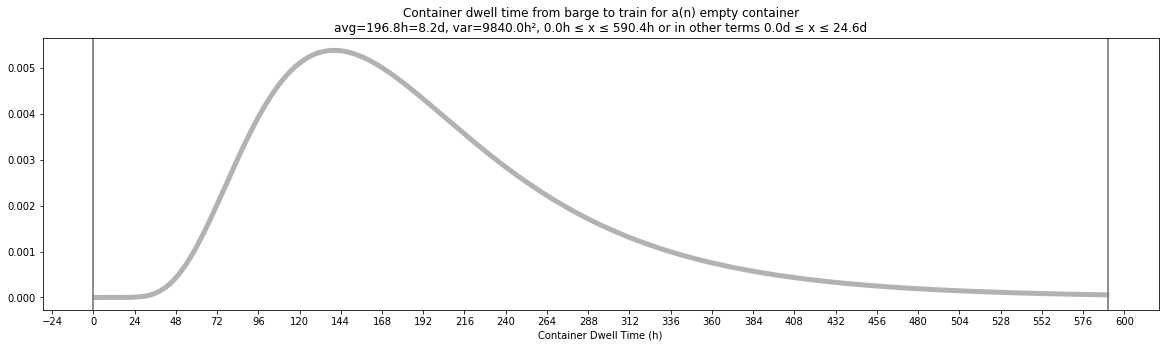

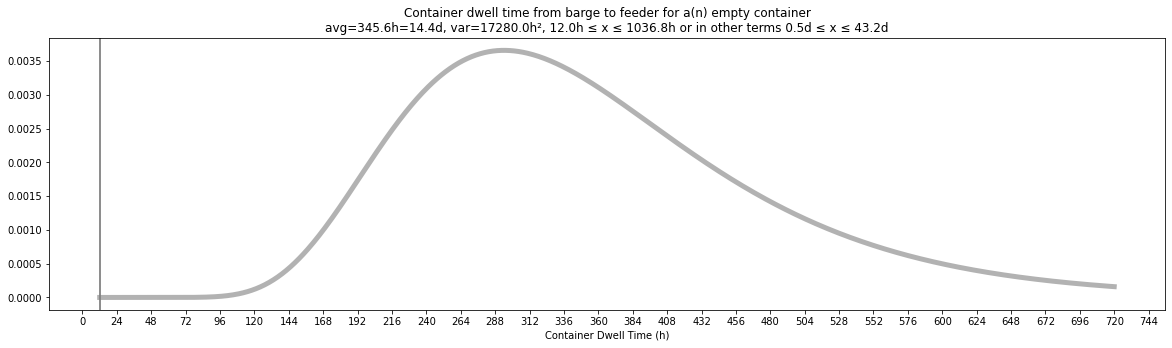

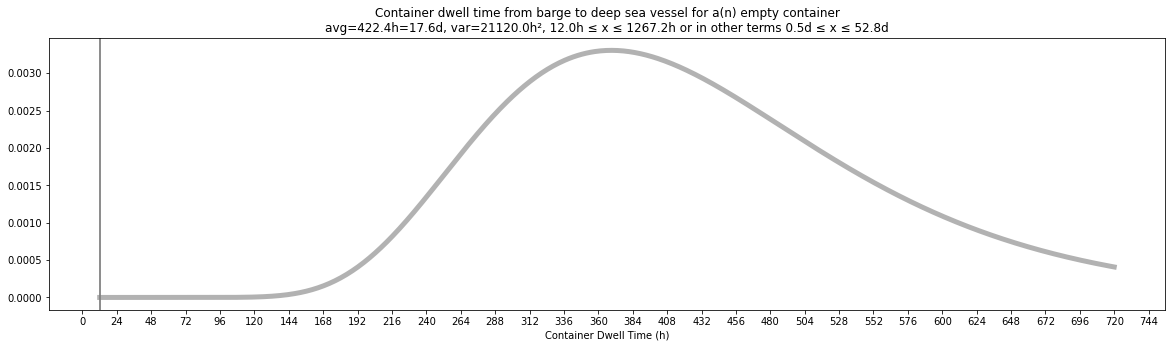

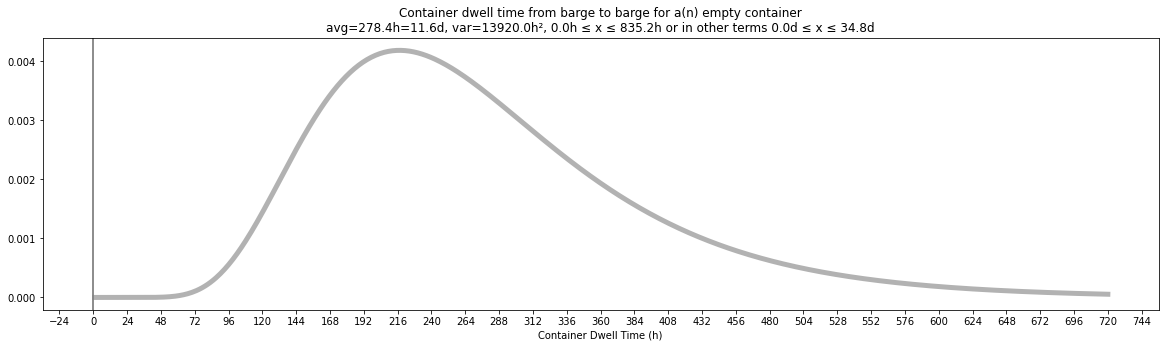

In [26]:
container_dwell_time_distribution_manager = conflowgen.ContainerDwellTimeDistributionManager()

distributions = container_dwell_time_distribution_manager.get_container_dwell_time_distribution()

number_days_in_hours = 30 * 24
x = np.linspace(0, number_days_in_hours, number_days_in_hours)
locator = matplotlib.ticker.MultipleLocator(24)

for storage_requirement in [
            conflowgen.StorageRequirement.standard, conflowgen.StorageRequirement.empty
        ]:
    
    display(Markdown(f"### {str(storage_requirement).title()} Container"))

    for inbound_vehicle in conflowgen.ModeOfTransport:

        display(Markdown(f"#### {str(inbound_vehicle).replace('_', ' ').title()}"))

        for outbound_vehicle in conflowgen.ModeOfTransport:
        
            distribution = distributions[inbound_vehicle][outbound_vehicle][storage_requirement]

            plt.figure(figsize=(20, 5))
            plt.axvline(distribution.minimum, color="dimgray")
            if distribution.maximum < number_days_in_hours:
                plt.axvline(distribution.maximum, color="dimgray")

            x_in_range = x[np.where((distribution.minimum < x) & (x < distribution.maximum))]

            plt.plot(
                x_in_range,
                distribution.get_probabilities(x_in_range),
                color='gray',
                lw=5,
                alpha=0.6,
            )
            plt.xlabel("Container Dwell Time (h)")
            plt.gca().xaxis.set_major_locator(locator)
            title = (
                f'Container dwell time from {str(inbound_vehicle).replace("_", " ")} to {str(outbound_vehicle).replace("_", " ")} '
                f'for a(n) {str(storage_requirement).replace("_", " ")} container\n'
                f'avg={distribution.average:.1f}h={distribution.average / 24:.1f}d, var={distribution.variance:.1f}h², '
                f'{distribution.minimum:.1f}h ≤ x ≤ {distribution.maximum:.1f}h or in other terms '
                f'{distribution.minimum / 24:.1f}d ≤ x ≤ {distribution.maximum / 24:.1f}d'
            )
            plt.title(title)
            plt.show()

## Default Values

In addition to the input distributions, also some default values are defined.
All of them are currently some kind of minimum or maximum value.
Thus, they directly influence other distributions.

All default values are optional.
They are only overwritten if provided.
The parameters `start_date` and `end_date` are obligatory though and no default values are provided.

In [25]:
container_flow_generation_manager = conflowgen.ContainerFlowGenerationManager()

container_flow_generation_manager.set_properties(
    start_date=datetime.date(2021, 1, 15),
    end_date=datetime.date(2021, 1, 31),
    transportation_buffer=0.4
)
container_flow_generation_manager.get_properties()

Loading destination distribution...


{'name': None,
 'start_date': datetime.date(2021, 1, 15),
 'end_date': datetime.date(2021, 1, 31),
 'transportation_buffer': 0.4}